# Explorer un corpus

## Imports

In [3]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

## Compter le nombre de documents dans le corpus

In [4]:
path = "../../data/txt/"
files = sorted(os.listdir(path))
len(files)

989

## Explorer les noms de fichier

Nous allons manipuler ici les chaines de caractères.

Il s'agit de la classe `str` en Python.

Pour en savoir plus : https://openclassrooms.com/fr/courses/235344-apprenez-a-programmer-en-python/231888-creez-votre-premier-objet-les-chaines-de-caracteres

In [5]:
chaine = 'KB_JB421_1909-11-12_01-00002'
type(chaine)

str

In [6]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['KB', 'JB421', '1909-11-12', '01-00002']

In [7]:
# Accéder à la date
date = chaine_split[2]

# Accéder à l'année
date_split = date.split('-')
year = date_split[0]

In [8]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'190'

In [9]:
year[-1]

'9'

In [10]:
year[:3] + '0s'

'1900s'

## Quelques statistiques

In [19]:
all_years = [str(year) for year in range(1830, 1970)]

In [12]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        

          # Vérification : doit au minimum avoir 3 éléments (indices 0,1,2)
        if len(elems) < 3:
            print("Nom de fichier invalide :", f)
            continue
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

Anomalous file: .Rhistory
Nom de fichier invalide : _README.txt


In [16]:
journaux = {
    "JB421":  "L'Avenir du Luxembourg",
    "JB427":  "La Libre Belgique",
    "JB555":  "L'Indépendance belge",
    "JB555A": "L'Indépendance belge (édité en Angleterre)",
    "JB567":  "Journal de Bruxelles",
    "JB572":  "Journal de Charleroi",
    "JB638":  "La Meuse",
    "JB685":  "Le Petit Bleu",
    "JB729":  "Le Vingtième Siècle",
    "JB773":  "Vers l'Avenir",
    "JB837":  "Le Peuple",
    "JB838":  "Le Soir",
    "JB1051": "Le Drapeau rouge",
    "B14138": "La Presse"
}

for code, nom in journaux.items():
    print(f"Il y a {count_newspapers[code]} exemplaires du journal {nom}.")

Il y a 33 exemplaires du journal L'Avenir du Luxembourg.
Il y a 73 exemplaires du journal La Libre Belgique.
Il y a 64 exemplaires du journal L'Indépendance belge.
Il y a 0 exemplaires du journal L'Indépendance belge (édité en Angleterre).
Il y a 24 exemplaires du journal Journal de Bruxelles.
Il y a 30 exemplaires du journal Journal de Charleroi.
Il y a 57 exemplaires du journal La Meuse.
Il y a 2 exemplaires du journal Le Petit Bleu.
Il y a 37 exemplaires du journal Le Vingtième Siècle.
Il y a 29 exemplaires du journal Vers l'Avenir.
Il y a 69 exemplaires du journal Le Peuple.
Il y a 453 exemplaires du journal Le Soir.
Il y a 116 exemplaires du journal Le Drapeau rouge.
Il y a 0 exemplaires du journal La Presse.


In [17]:
for decade in sorted(count_decade.keys()):
    print(f"Il y a {count_decade[decade]} fichiers pour la décennie {decade}")

Il y a 2 fichiers pour la décennie 1830s
Il y a 8 fichiers pour la décennie 1840s
Il y a 9 fichiers pour la décennie 1850s
Il y a 16 fichiers pour la décennie 1860s
Il y a 7 fichiers pour la décennie 1870s
Il y a 16 fichiers pour la décennie 1880s
Il y a 15 fichiers pour la décennie 1890s
Il y a 25 fichiers pour la décennie 1900s
Il y a 22 fichiers pour la décennie 1910s
Il y a 53 fichiers pour la décennie 1920s
Il y a 71 fichiers pour la décennie 1930s
Il y a 306 fichiers pour la décennie 1940s
Il y a 166 fichiers pour la décennie 1950s
Il y a 262 fichiers pour la décennie 1960s
Il y a 9 fichiers pour la décennie 1970s


In [21]:
# Liste des années manquantes
missing_years = [y for y in all_years if y not in covered_years]

# Affichage du nombre total et de la liste
print(f"Nombre total d'années manquantes : {len(missing_years)}")
print(f"Années manquantes : {', '.join(sorted(missing_years))}")

Nombre total d'années manquantes : 33
Années manquantes : 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1838, 1840, 1841, 1843, 1844, 1851, 1852, 1854, 1855, 1856, 1859, 1862, 1871, 1872, 1873, 1875, 1877, 1893, 1899, 1915, 1916, 1917, 1918, 1941, 1942, 1944


## Visualisation du nombre de journaux par mois

Ces visualisations sont obtenues avec la librairie Matplotlib.

Pour en savoir plus : https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/4740942-maitrisez-les-possibilites-offertes-par-matplotlib.

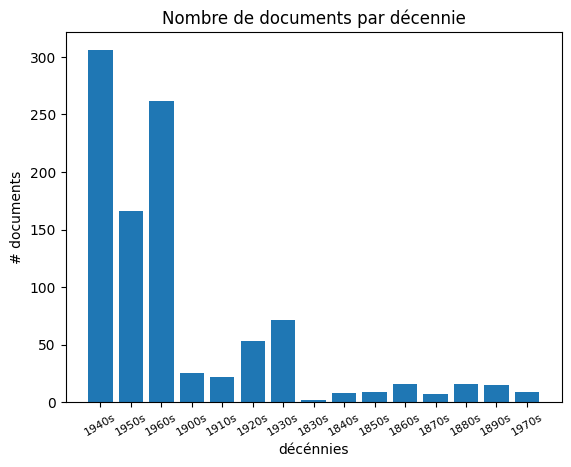

In [26]:
# Trier les décennies (chaînes comme "1830s", "1840s", ...) par valeur numérique
decades = sorted(count_decade.keys(), key=lambda x: int(x[:4]))
values = [count_decade[d] for d in decades]

index = np.arange(len(count_decade))
plt.bar(index, count_decade.values())
plt.xlabel('décénnies')
plt.ylabel('# documents')
plt.xticks(index, count_decade.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par décennie')
plt.show()

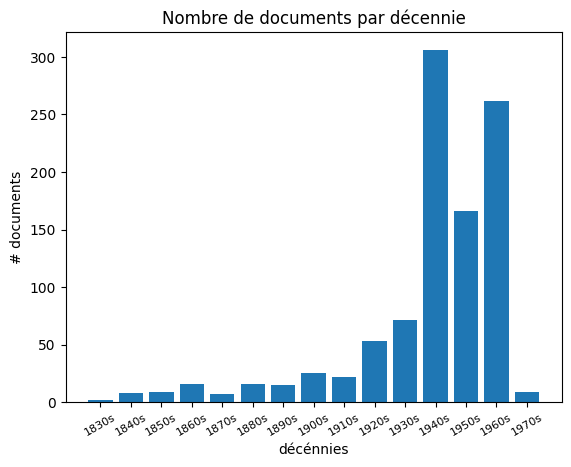

In [27]:
# Trier les décennies (chaînes comme "1830s", "1840s", ...) par valeur numérique
decades = sorted(count_decade.keys(), key=lambda x: int(x[:4]))
values = [count_decade[d] for d in decades]

index = np.arange(len(decades))
plt.bar(index,values)
plt.xlabel('décénnies')
plt.ylabel('# documents')
plt.xticks(index, decades, fontsize=8, rotation=30)
plt.title('Nombre de documents par décennie')
plt.show()